In [1]:
from IPython.display import display, Markdown, Latex, Javascript
import emoji
import time
import ipywidgets as widgets
import ipython_blocking
import visa
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook

import skrf as rf

rf.stylely()


display(Markdown('### ðŸ’  F2 Terms Verification'))
#display(Markdown('> *' + time.ctime() +
#                 '* <br>Connect Power Meter to `Port 1` and press *Run* ðŸ’¡ ![](gif/714.gif)'))

button = widgets.Button(
    description='Run',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='play'
)
button

### ðŸ’  F2 Terms Verification

Button(button_style='success', description='Run', icon='play', style=ButtonStyle(), tooltip='Click me')

In [ ]:
%blockrun button

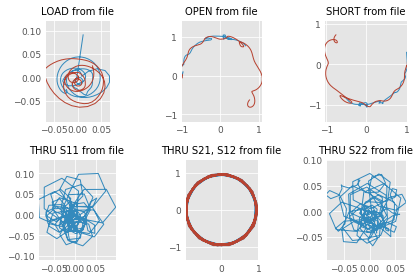

In [2]:
# read data from file
load1_r = np.loadtxt('LOAD1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
open1_r = np.loadtxt('OPEN1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
short1_r = np.loadtxt('SHORT1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
load2_r = np.loadtxt('LOAD2.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
open2_r = np.loadtxt('OPEN2.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
short2_r = np.loadtxt('SHORT2.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
thru11_r = np.loadtxt('THRU1_1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
thru22_r = np.loadtxt('THRU2_2.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
thru12_r = np.loadtxt('THRU1_2.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
thru21_r = np.loadtxt('THRU2_1.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)

fig3, axs3 = plt.subplots(2, 3)
axs3[0,0].plot(load1_r.real,load1_r.imag, '-')
axs3[0,0].plot(load2_r.real,load2_r.imag, '-')
axs3[0,0].set_aspect('equal')
axs3[0,0].set_title('LOAD from file', fontsize=10)
axs3[0,1].plot(open1_r.real,open1_r.imag, '-')
axs3[0,1].plot(open2_r.real,open2_r.imag, '-')
axs3[0,1].set_aspect('equal', 'box')
axs3[0,1].set_title('OPEN from file', fontsize=10)
axs3[0,2].plot(short1_r.real,short1_r.imag, '-')
axs3[0,2].plot(short2_r.real,short2_r.imag, '-')
axs3[0,2].set_aspect('equal', 'box')
axs3[0,2].set_title('SHORT from file', fontsize=10)

axs3[1,0].plot(thru11_r.real,thru11_r.imag, '-')
axs3[1,0].set_aspect('equal')
axs3[1,0].set_title('THRU S11 from file', fontsize=10)
axs3[1,1].plot(thru21_r.real,thru21_r.imag, '-')
axs3[1,1].plot(thru12_r.real,thru12_r.imag, '-')
axs3[1,1].set_aspect('equal', 'box')
axs3[1,1].set_title('THRU S21, S12 from file', fontsize=10)
axs3[1,2].plot(thru22_r.real,thru22_r.imag, '-')
axs3[1,2].set_aspect('equal', 'box')
axs3[1,2].set_title('THRU S22 from file', fontsize=10)

fig3.tight_layout()

plt.show()

In [3]:
#button.layout.visibility = 'hidden'
display(Markdown('> *' + time.ctime() + '* <br>ðŸ”Œ Connecting to the device, please wating... ![](gif/714.gif)'))

%run DeviceBundle.py
   
rm = visa.ResourceManager()

legacy = DeviceBundle('Legacy device', rm, '192.168.1.212:5025')
ng = DeviceBundle('Nextgen device', rm, '192.168.1.193:5025') #Ubuntu
#ng = DeviceBundle('Nextgen device', rm, '192.168.1.85:5025') #Marina
#ng = DeviceBundle('Nextgen device', rm, '192.168.1.61:5025') #Nikita

widgets.HBox([legacy.box(), ng.box()])

      
        

> *Fri Dec  6 15:56:57 2019* <br>ðŸ”Œ Connecting to the device, please wating... ![](gif/714.gif)

In [4]:
display(Markdown('### ðŸ’  Connect to the devices and continue'))
button2 = widgets.Button(
    description='Continue',
    disabled=True,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
button2.layout.visibility = 'hidden'

def onConnected(device):
    print('Trigger connection')
    if((device == legacy and ng.is_connected()) or (device == ng and legacy.is_connected)):
        print('All device connected')
        button2.disabled=False
        button2.layout.visibility = 'visible'
        #button2.click()
        #time.sleep(1)
        #button2.click()
        
ng.onConnected(onConnected)
legacy.onConnected(onConnected)
button2

### ðŸ’  Connect to the devices and continue

Button(button_style='success', description='Continue', disabled=True, icon='gear', layout=Layout(visibility='hâ€¦

In [ ]:
%blockrun button2

In [5]:
button2.layout.visibility = 'hidden'

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider

inst = legacy.instance()
inst2 = ng.instance()

print('Device1: ' + str(inst))
print('Device2: ' + str(inst2))
# @interact(points=FloatSlider(min=2, max=1e3, step=1, continuous_update=False, value = 201))
# def Points(points):
#     inst.write("SENS:SWE:POIN " + str(points))
    

Device1: TCPIPSocket at TCPIP0::192.168.1.212::5025::SOCKET
Device2: TCPIPSocket at TCPIP0::192.168.1.212::5026::SOCKET


In [6]:
import numpy as np
import time
from tqdm import tqdm_notebook

inst.write("SYST:PRES")
inst.write("*CLS")
inst.write("SENS:FREQ:STAR 1 MHz")
inst.write("SENS:CORR:CLE")
inst.write("SENS:CORR:COLL:CLE")
# inst.write("TRIG:SOUR INT")
# inst.write("TRIG:SOUR BUS")
# inst.query("TRIG:SOUR?")

inst.write("SENS:CORR:TRIG:FREE ON")
inst.query("SENS:CORR:TRIG:FREE?")
inst.query("SYST:ERR?")

'0,"No error"'

In [7]:
inst.write("SENS:FREQ:STAR 1 MHz")
inst.write("SENS:FREQ:STOP 4.8 GHz")
inst.write("SENS:CORR:COLL:METH:SOLT2 1,2")

inst2.write("SENS:FREQ:STAR 1 MHz")
inst2.write("SENS:FREQ:STOP 4.8 GHz")
inst2.write("SENS:CORR:COLL:METH:SOLT2 1,2")

for i in tqdm_notebook(range(5), desc='Config...', leave=False):
        time.sleep(1)

display(Markdown('### ðŸ’  Stimulus and cal method configured press to continue'))
button3 = widgets.Button(
    description='Continue',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
button3

### ðŸ’  Stimulus and cal method configured press to continue

Button(button_style='success', description='Continue', icon='gear', style=ButtonStyle(), tooltip='Click me')

In [ ]:
%blockrun button3

In [8]:
button3.layout.visibility = 'hidden'
# Ð·Ð°Ð³Ñ€ÑƒÐ·Ð¸Ñ‚ÑŒ Ð´Ð°Ð½Ð½Ñ‹Ðµ Ð¼ÐµÑ€ Ð² Ð¿Ñ€Ð¸Ð»Ð¾Ð¶ÐµÐ½Ð¸Ðµ Ð¸ Ð¿Ñ€Ð¸Ð¼ÐµÐ½Ð¸Ñ‚ÑŒ ÐºÐ°Ð»Ð¸Ð±Ñ€Ð¾Ð²ÐºÑƒ 

def push_to_device(inst, std_ports = [], open_data = [], short_data = [], load_data = [], thru_data = []):
    def push_to_device_reflections(inst, std_port, open_data, short_data, load_data):
        inst.write_ascii_values('SENS:CORR:COLL:DATA:LOAD '+ str(std_port) + ',', load_data.view(np.float64).tolist(), converter='e')
        #inst2.query("*OPC?")
        inst.query("SYST:ERR?")

        inst.write_ascii_values('SENS:CORR:COLL:DATA:OPEN '+ str(std_port) + ',', open_data.view(np.float64).tolist(), converter='e')
        #inst2.query("*OPC?")
        inst.query("SYST:ERR?")

        inst.write_ascii_values('SENS:CORR:COLL:DATA:SHOR '+ str(std_port) + ',', short_data.view(np.float64).tolist(), converter='e')
        #inst2.query("*OPC?")
        inst.query("SYST:ERR?")
        # Ð¿Ñ€Ð¸Ð¼ÐµÐ½Ð¸Ñ‚ÑŒ ÐºÐ°Ð»Ð¸Ð±Ñ€Ð¾Ð²ÐºÑƒ

    def push_to_device_transitions(inst, std_ports = [], s = []):
        inst.write_ascii_values('SENS:CORR:COLL:DATA:THRU:MATC '\
                                + str(std_ports[0]) + ',' + str(std_ports[1]) + ',',\
                                s[0][0].view(np.float64).tolist(), converter='e')
        inst.query("SYST:ERR?")
        inst.write_ascii_values('SENS:CORR:COLL:DATA:THRU:TRAN '\
                                + str(std_ports[0]) + ',' + str(std_ports[1]) + ',',\
                                s[0][1].view(np.float64).tolist(), converter='e')
        inst.query("SYST:ERR?")
        inst.write_ascii_values('SENS:CORR:COLL:DATA:THRU:MATC '\
                                + str(std_ports[1]) + ',' + str(std_ports[0]) + ',',\
                                s[1][0].view(np.float64).tolist(), converter='e')
        inst.query("SYST:ERR?")
        inst.write_ascii_values('SENS:CORR:COLL:DATA:THRU:TRAN '\
                                + str(std_ports[1]) + ',' + str(std_ports[0]) + ',',\
                                s[1][1].view(np.float64).tolist(), converter='e')
        #inst2.query("*OPC?")
        inst.query("SYST:ERR?")
            
    push_to_device_reflections(inst, std_ports[0], open_data[0], short_data[0], load_data[0])
    push_to_device_reflections(inst, std_ports[1], open_data[1], short_data[1], load_data[1])
    push_to_device_transitions(inst, std_ports, thru_data)

thru_data = [[thru11_r, thru21_r], [thru12_r, thru22_r]]
#print(thru_data[0][0].view(np.float64).tolist())

In [9]:
push_to_device(inst, [1,2], [open1_r, open2_r], [short1_r, short2_r], [load1_r, load2_r], thru_data)
# inst.write("SENS:CORR:COLL:METH:SOLT2 1,2")
# inst.query("SYST:ERR?")

In [10]:
push_to_device(inst2, [1,2], [open1_r, open2_r], [short1_r, short2_r], [load1_r, load2_r], thru_data)
# inst2.write("SENS:CORR:COLL:METH:SOLT2 1,2")
# inst2.query("SYST:ERR?")
print('save on inst2')

save on inst2


In [11]:
display(Markdown('### ðŸ’  Calibration data uploaded to devices'))
save_button = widgets.Button(
    description='SAVE',
    disabled=False,
    button_style='warning',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
save_button

### ðŸ’  Calibration data uploaded to devices

Button(button_style='warning', description='SAVE', icon='gear', style=ButtonStyle(), tooltip='Click me')

In [ ]:
%blockrun save_button

In [12]:
save_button.layout.visibility = 'hidden'

inst.write("SENS:CORR:COLL:SAVE")
# inst.query("*OPC?")
inst.query("SYST:ERR?")

'0,"No error"'

In [13]:
inst2.write("SENS:CORR:COLL:SAVE")
#inst.query("*OPC?")
inst2.query("SYST:ERR?")

''

In [ ]:
for i in tqdm_notebook(range(5), desc='Saving...', leave=False):
        time.sleep(1)

In [15]:
   
display(Markdown('### ðŸ˜™ Calibration saved'))
button4 = widgets.Button(
    description='Continue',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
button4

### ðŸ˜™ Calibration saved

Button(button_style='success', description='Continue', icon='gear', style=ButtonStyle(), tooltip='Click me')

In [ ]:
%blockrun button4

In [16]:
button4.layout.visibility = 'hidden'

from tqdm import tqdm_notebook

def pull_refl_terms(inst, port):
    t = tqdm_notebook(total=3, leave=False)    
    
    t.set_description(f"SENS:CORR:COEF? ER, {port}")
    er = inst.query_ascii_values('SENS:CORR:COEF? ER,' + str(port) + ','+ str(port), container=np.array, converter='e')
    complex_er = er.astype(np.float32).view(np.complex64)
    t.update(1)
    
    t.set_description(f"SENS:CORR:COEF? ED, {port}")
    ed = inst.query_ascii_values('SENS:CORR:COEF? ED,' + str(port) + ','+ str(port), container=np.array, converter='e')
    complex_ed = ed.astype(np.float32).view(np.complex64)
    t.update(2)
    
    t.set_description(f"SENS:CORR:COEF? ES, {port}")
    es = inst.query_ascii_values('SENS:CORR:COEF? ES,' + str(port) + ','+ str(port), container=np.array, converter='e')
    complex_es = es.astype(np.float32).view(np.complex64)
    t.update(3)
    return complex_er, complex_ed, complex_es

def pull_tran_terms(inst, port1, port2):
    t = tqdm_notebook(total=3, leave=False)   
    
    t.set_description(f"SENS:CORR:COEF? ET, {port1}, {port2}")
    et = inst.query_ascii_values('SENS:CORR:COEF? ET,' + str(port1) + ',' + str(port2), container=np.array, converter='e')
    complex_et = et.astype(np.float32).view(np.complex64)
    t.update(1)
    
    t.set_description(f"SENS:CORR:COEF? EX, {port1}, {port2}")
    ex = inst.query_ascii_values('SENS:CORR:COEF? EX,' + str(port1) + ',' + str(port2), container=np.array, converter='e')
    complex_ex = ex.astype(np.float32).view(np.complex64)
    t.update(2)
    
    t.set_description(f"SENS:CORR:COEF? EL, {port1}, {port2}")
    el = inst.query_ascii_values('SENS:CORR:COEF? EL,' + str(port1) + ',' + str(port2), container=np.array, converter='e')
    complex_el = el.astype(np.float32).view(np.complex64)
    t.update(3)
    
    return complex_et, complex_ex, complex_el

er1_1, ed1_1, es1_1 = pull_refl_terms(inst, 1)
er1_2, ed1_2, es1_2 = pull_refl_terms(inst, 2)
et1_12, ex1_12, el1_12 = pull_tran_terms(inst, 1, 2)
et1_21, ex1_21, el1_21 = pull_tran_terms(inst, 2, 1)

er2_1, ed2_1, es2_1 = pull_refl_terms(inst2, 1)
er2_2, ed2_2, es2_2 = pull_refl_terms(inst2, 2)
et2_12, ex2_12, el2_12 = pull_tran_terms(inst2, 1, 2)
et2_21, ex2_21, el2_21 = pull_tran_terms(inst2, 2, 1)

In [17]:
def delta(first, second):
    d = first - second
    d_pass = np.allclose(first, second, rtol=1e-05, atol=1e-08, equal_nan=False)
    return d, d_pass

def plot_terms(p, title, first_data, second_data):
    p.plot(first_data.real,first_data.imag, '-', alpha=0.5)
    p.plot(second_data.real,second_data.imag, '-', alpha=0.5)
    p.set_aspect('equal')
    p.set_title(title, fontsize=10)
def plot_delta(p, title, delta_data, pass_data):    
    p.plot(delta_data.real,delta_data.imag, '-')
    p.set_aspect('equal')
    p.set_title(title, fontsize=10)
    plt.setp(p.spines.values(), color='green' if pass_data else  'red')
    
d_er1, d_er1_pass = delta(er1_1, er2_1)
d_ed1, d_ed1_pass = delta(ed1_1, ed2_1)
d_es1, d_es1_pass = delta(es1_1, es2_1)
d_er2, d_er2_pass = delta(er1_2, er2_2)
d_ed2, d_ed2_pass = delta(ed1_2, ed2_2)
d_es2, d_es2_pass = delta(es1_2, es2_2)

d_et12, d_et12_pass = delta(et1_12, et2_12)
d_ex12, d_ex12_pass = delta(ex1_12, ex2_12)
d_el12, d_el12_pass = delta(el1_12, el2_12)
d_et21, d_et21_pass = delta(et1_21, et2_21)
d_ex21, d_ex21_pass = delta(ex1_21, ex2_21)
d_el21, d_el21_pass = delta(el1_21, el2_21)

fig4, axs4 = plt.subplots(6, 4, figsize=(15,15))


t = tqdm_notebook(total=24, leave=False)
t.set_description(f"plotting...")
### ER 1
plot_terms(axs4[0,0], 'ER1', er1_1, er2_1); t.update(1)
plot_delta(axs4[0,1], 'ER1 Error', d_er1, d_er1_pass); t.update(2)

### ER 2
plot_terms(axs4[0,2], 'ER2', er1_2, er2_2); t.update(3)
plot_delta(axs4[0,3], 'ER2 Error', d_er2, d_er2_pass); t.update(4)

### ED 1
plot_terms(axs4[1,0], 'ED1', ed1_1, ed2_1); t.update(5)
plot_delta(axs4[1,1], 'ED1 Error', d_ed1, d_ed1_pass); t.update(6)

### ED 2
plot_terms(axs4[1,2], 'ED2', ed1_2, ed2_2); t.update(7)
plot_delta(axs4[1,3], 'ED2 Error', d_ed2, d_ed2_pass); t.update(8)

### ES 1
plot_terms(axs4[2,0], 'ES1', es1_1, es2_1); t.update(9)
plot_delta(axs4[2,1], 'ES1 Error', d_es1, d_es1_pass); t.update(10)

### ES 2
plot_terms(axs4[2,2], 'ES2', es1_2, es2_2); t.update(11)
plot_delta(axs4[2,3], 'ES21 Error', d_es2, d_es2_pass); t.update(12)

### ET 12
plot_terms(axs4[3,0], 'ET12', et1_12, et2_12); t.update(13)
plot_delta(axs4[3,1], 'ET12 Error', d_et12, d_et12_pass); t.update(14)

### ET 21
plot_terms(axs4[3,2], 'ET21', et1_21, et2_21); t.update(15)
plot_delta(axs4[3,3], 'ET21 Error', d_et21, d_et21_pass); t.update(16)

### EX 12
plot_terms(axs4[4,0], 'EX12', ex1_12, ex2_12); t.update(17)
plot_delta(axs4[4,1], 'EX12 Error', d_ex12, d_ex12_pass); t.update(18)

### EX 21
plot_terms(axs4[4,2], 'EX21', ex1_21, ex2_21); t.update(19)
plot_delta(axs4[4,3], 'EX21 Error', d_ex21, d_ex21_pass); t.update(20)


### EL 12
plot_terms(axs4[5,0], 'EL12', el1_12, el2_12); t.update(21)
plot_delta(axs4[5,1], 'EL12 Error', d_el12, d_el12_pass); t.update(22)

### EL 21
plot_terms(axs4[5,2], 'EL21', el1_21, el2_21); t.update(23)
plot_delta(axs4[5,3], 'EL21 Error', d_el21, d_el21_pass); t.update(24)

fig4.tight_layout()

plt.show()

ValueError: operands could not be broadcast together with shapes (201,) (0,) 

In [ ]:
display(Markdown('### ðŸ’  Start correction verify'))
button5 = widgets.Button(
    description='Continue',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
button5

In [ ]:
%blockrun button5

In [ ]:
button5.layout.visibility = 'hidden'

In [254]:
inst.write("TRIG:SOUR BUS")
inst.query("SYST:ERR?")
inst.write("TRIG:SING")
inst.query("SYST:ERR?")
inst.query("*OPC?")
inst.query("SYST:ERR?")

raw_data_s11 = inst.query_ascii_values('SENS:DATA:RAWD? S11', container=np.array, converter='e').astype(np.float32).view(np.complex64)
time.sleep(1)
raw_data_s21 = inst.query_ascii_values('SENS:DATA:RAWD? S21', container=np.array, converter='e').astype(np.float32).view(np.complex64)
time.sleep(1)
raw_data_s12 = inst.query_ascii_values('SENS:DATA:RAWD? S12', container=np.array, converter='e').astype(np.float32).view(np.complex64)
time.sleep(1)
raw_data_s22 = inst.query_ascii_values('SENS:DATA:RAWD? S22', container=np.array, converter='e').astype(np.float32).view(np.complex64)

In [148]:
#raw_data_s21.fill(1)
#raw_data_s21.real = np.arange(0,100000,100000/201)
#raw_data_s12.imag = np.arange(100000,300000,200000/201)

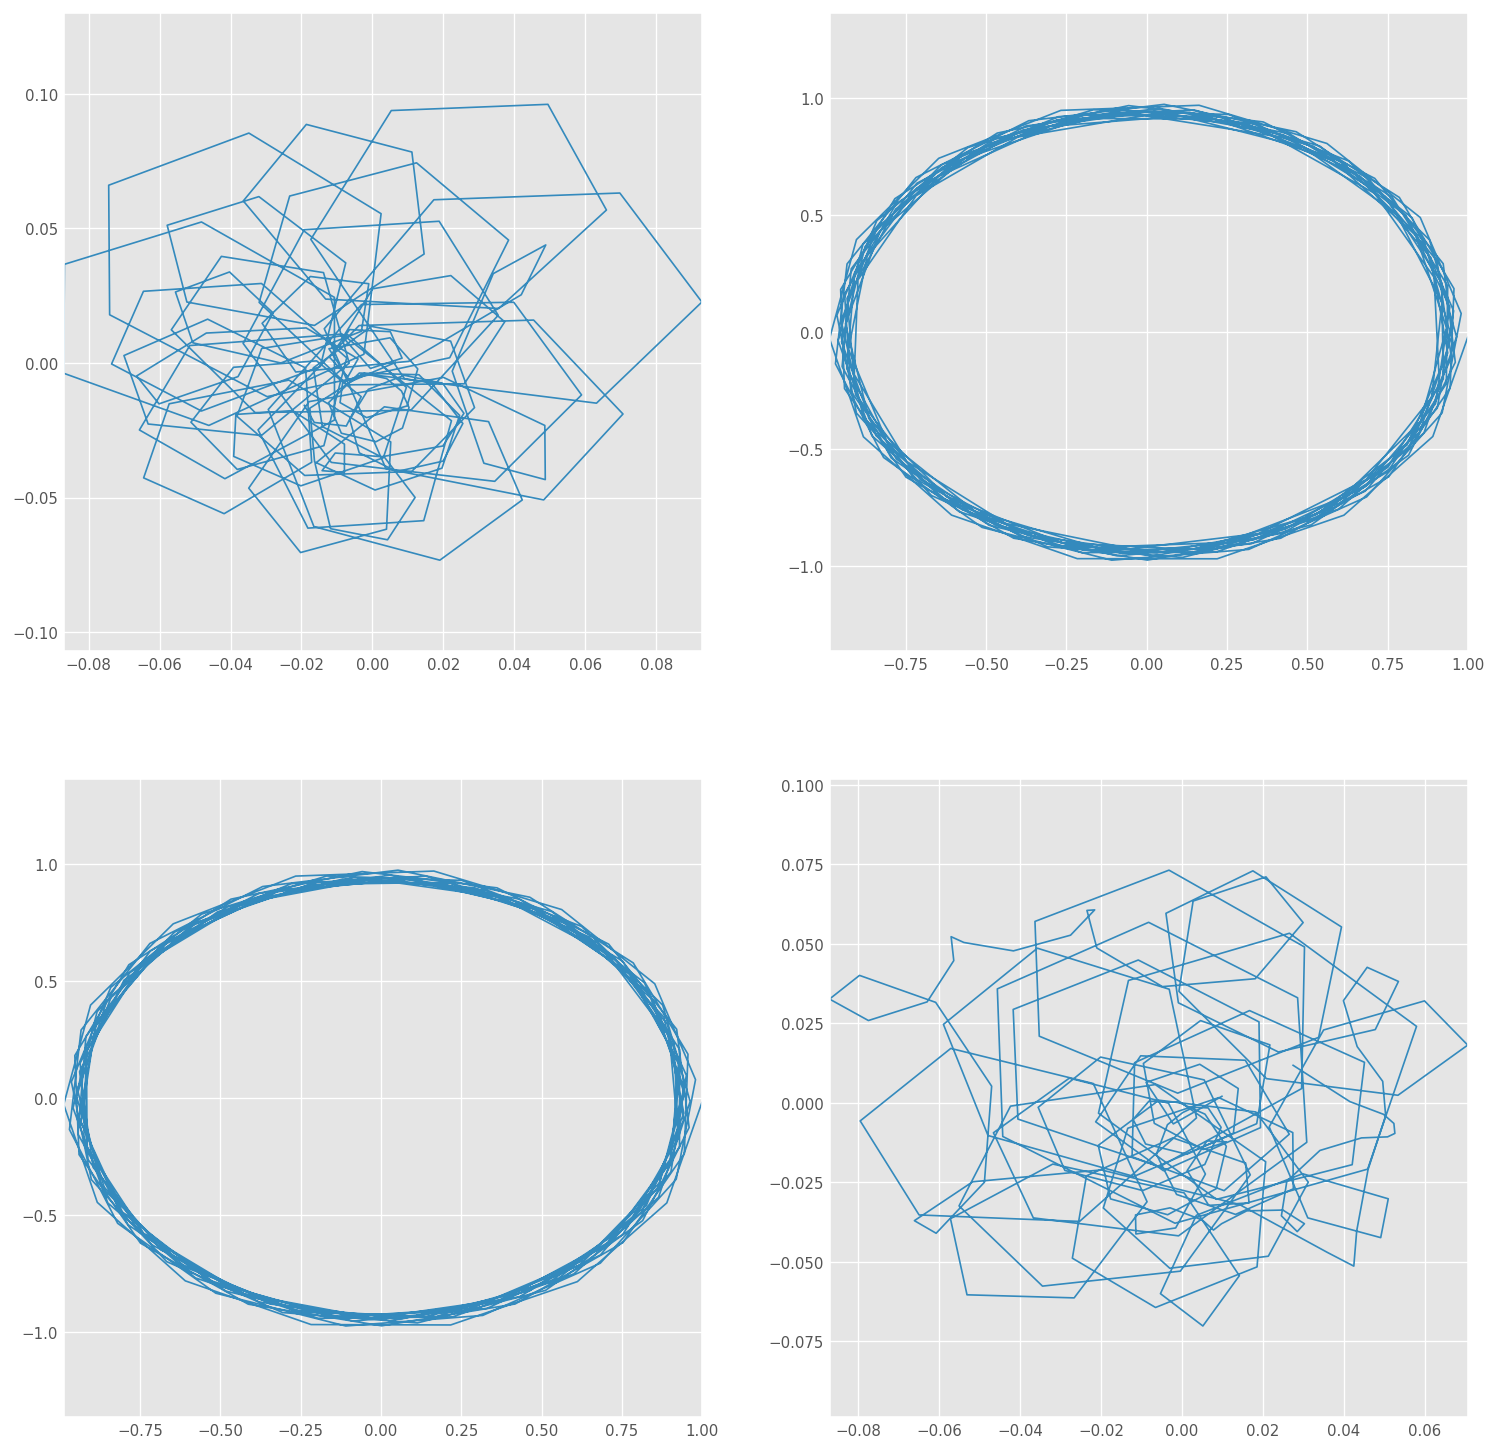

In [255]:
fig0, axs0 = plt.subplots(2, 2, figsize=(15,15))
axs0[0,0].plot(raw_data_s11.real,raw_data_s11.imag, '-')
axs0[0,1].plot(raw_data_s21.real,raw_data_s21.imag, '-')
axs0[1,0].plot(raw_data_s12.real,raw_data_s12.imag, '-')
axs0[1,1].plot(raw_data_s22.real,raw_data_s22.imag, '-')

In [256]:
inst2.write_ascii_values('SENS:DATA:RAWD S11,', raw_data_s11.view(np.float32).tolist(), converter='e')
inst2.write_ascii_values('SENS:DATA:RAWD S21,', raw_data_s21.view(np.float32).tolist(), converter='e')
inst2.write_ascii_values('SENS:DATA:RAWD S12,', raw_data_s12.view(np.float32).tolist(), converter='e')
inst2.write_ascii_values('SENS:DATA:RAWD S22,', raw_data_s22.view(np.float32).tolist(), converter='e')

(5465, <StatusCode.success: 0>)

### S11 verify

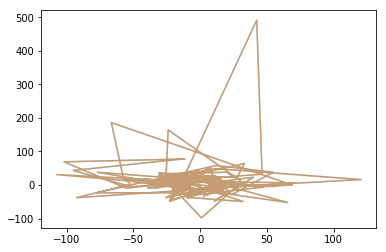

In [196]:
display(Markdown('### S11 verify'))

corr_data1 = inst.query_ascii_values('SENS:DATA:CORR? S11', container=np.array, converter='e').astype(np.float32).view(np.complex64)
plt.plot(corr_data1.real,corr_data1.imag, '-', alpha=0.5)

corr_data2 = inst2.query_ascii_values('SENS:DATA:CORR? S11', container=np.array, converter='e').astype(np.float32).view(np.complex64)
plt.plot(corr_data2.real,corr_data2.imag, '-', alpha=0.5)

d_s11, s11_pass = delta(corr_data1, corr_data2)

# plt.set_aspect('equal')
# plt.set_title("S11", fontsize=10)

### S21 verify

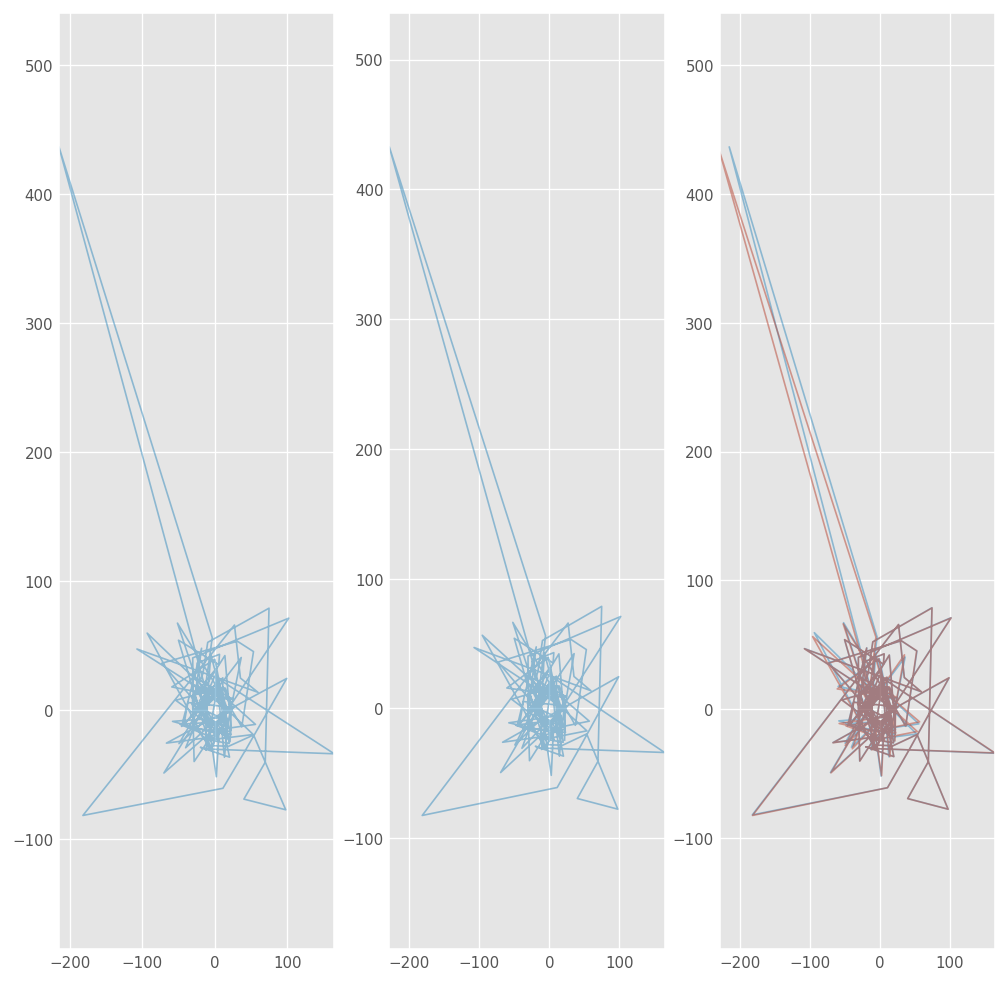

In [221]:
display(Markdown('### S21 verify'))

fig21, axs21 = plt.subplots(1, 3, figsize=(10,10))

corr_data1 = inst.query_ascii_values('SENS:DATA:CORR? S21', container=np.array, converter='e').astype(np.float32).view(np.complex64)
axs21[0].plot(corr_data1.real,corr_data1.imag, '-', alpha=0.5)
axs21[2].plot(corr_data1.real,corr_data1.imag, '-', alpha=0.5)

corr_data2 = inst2.query_ascii_values('SENS:DATA:CORR? S21', container=np.array, converter='e').astype(np.float32).view(np.complex64)
axs21[1].plot(corr_data2.real,corr_data2.imag, '-', alpha=0.5)
axs21[2].plot(corr_data2.real,corr_data2.imag, '-', alpha=0.5)

d_s21, s21_pass = delta(corr_data1, corr_data2)

s21_1 = rf.Network(s=corr_data1, f=np.linspace(300e3,4.8e9,201), f_unit='Hz')
s21_2 = rf.Network(s=corr_data2, f=np.linspace(300e3,4.8e9,201), f_unit='Hz')
s21_d = s21_1 - s21_2

# plt.set_aspect('equal')
# plt.set_title("S21", fontsize=10)

### S12 verify

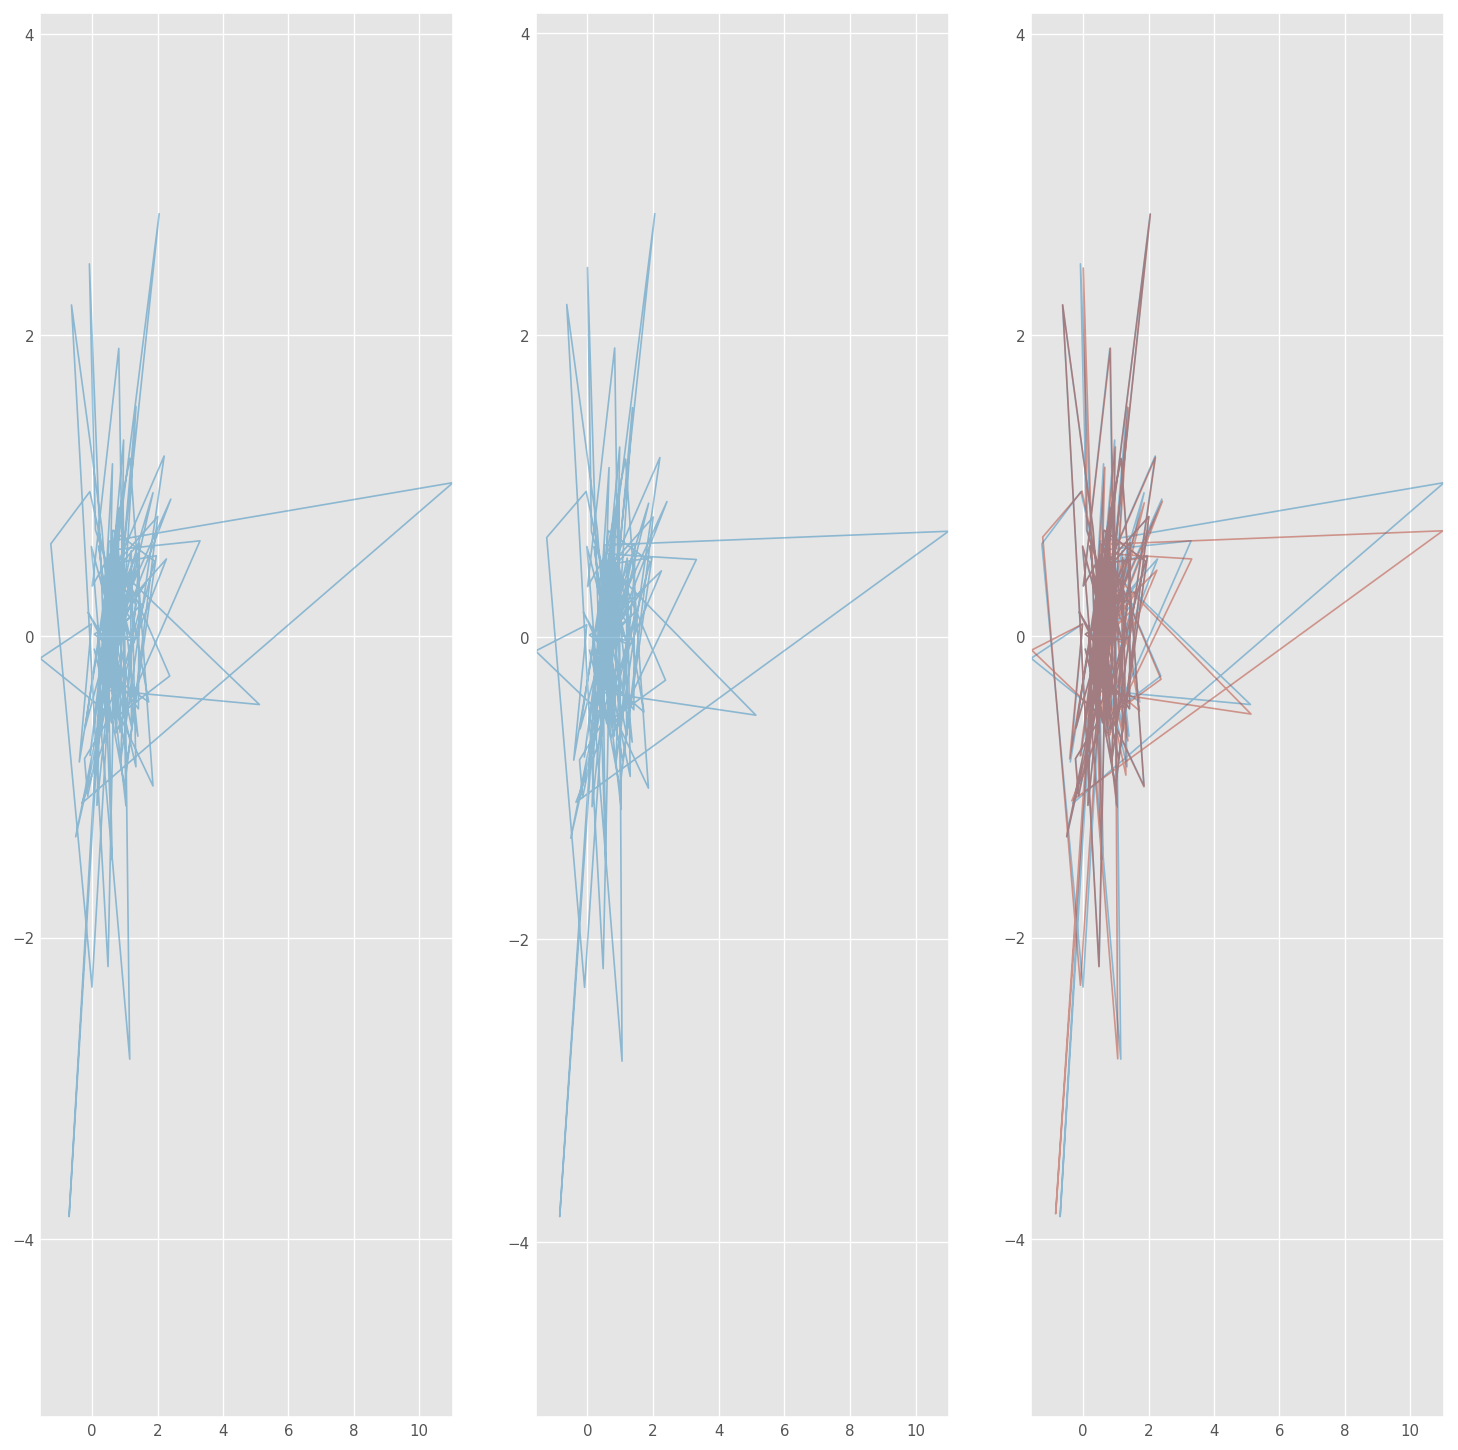

In [222]:
display(Markdown('### S12 verify'))

fig12, axs12 = plt.subplots(1, 3, figsize=(15,15))

corr_data1 = inst.query_ascii_values('SENS:DATA:CORR? S12', container=np.array, converter='e').astype(np.float32).view(np.complex64)
axs12[0].plot(corr_data1.real,corr_data1.imag, '-', alpha=0.5)
axs12[2].plot(corr_data1.real,corr_data1.imag, '-', alpha=0.5)

corr_data2 = inst2.query_ascii_values('SENS:DATA:CORR? S12', container=np.array, converter='e').astype(np.float32).view(np.complex64)
axs12[1].plot(corr_data2.real,corr_data2.imag, '-', alpha=0.5)
axs12[2].plot(corr_data2.real,corr_data2.imag, '-', alpha=0.5)

d_s12, s12_pass = delta(corr_data1, corr_data2)

s12_1 = rf.Network(s=corr_data1, f=np.linspace(300e3,4.8e9,201), f_unit='Hz')
s12_2 = rf.Network(s=corr_data2, f=np.linspace(300e3,4.8e9,201), f_unit='Hz')
s12_d = s12_1 - s12_2

# plt.set_aspect('equal')
# plt.set_title("S12", fontsize=10)

### S22 verify

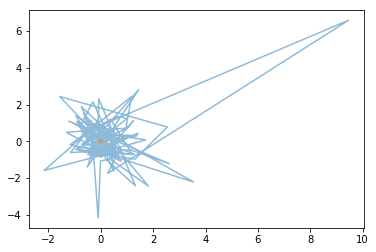

In [152]:
display(Markdown('### S22 verify'))

corr_data1 = inst.query_ascii_values('SENS:DATA:CORR? S22', container=np.array, converter='e').astype(np.float32).view(np.complex64)
plt.plot(corr_data1.real,corr_data1.imag, '-', alpha=0.5)

corr_data2 = inst2.query_ascii_values('SENS:DATA:CORR? S22', container=np.array, converter='e').astype(np.float32).view(np.complex64)
plt.plot(corr_data2.real,corr_data2.imag, '-', alpha=0.5)

d_s22, s22_pass = delta(corr_data1, corr_data2)

# plt.set_aspect('equal')
# plt.set_title("S22", fontsize=10)

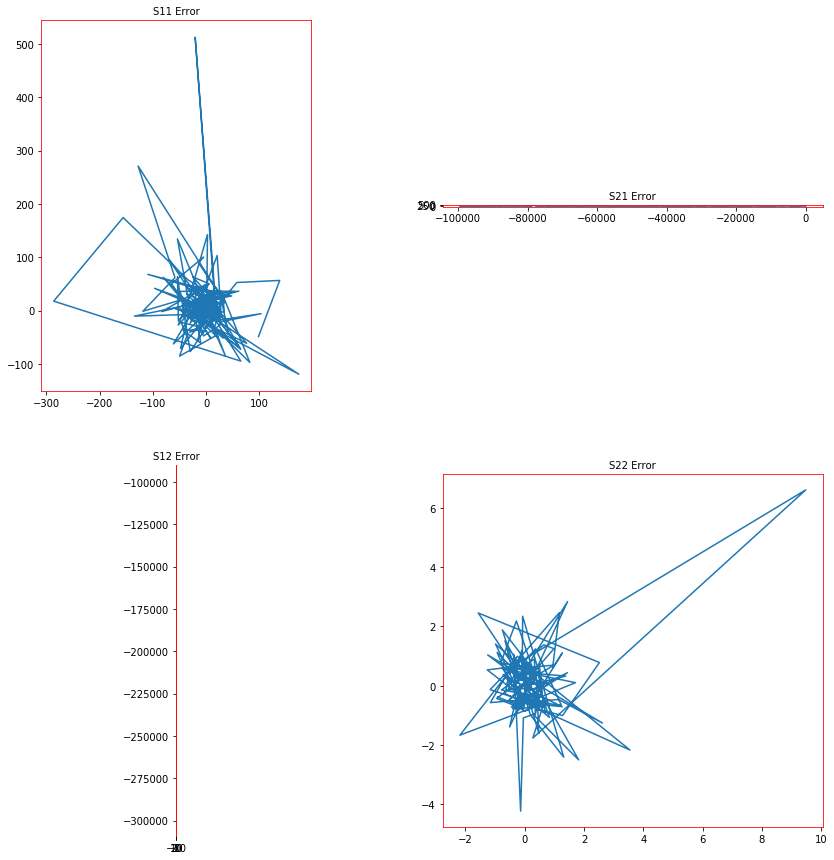

In [153]:
fig5, axs5 = plt.subplots(2, 2, figsize=(15,15))
plot_delta(axs5[0,0], 'S11 Error', d_s11, s11_pass);
plot_delta(axs5[0,1], 'S21 Error', d_s21, s21_pass);
plot_delta(axs5[1,0], 'S12 Error', d_s12, s12_pass);
plot_delta(axs5[1,1], 'S22 Error', d_s22, s22_pass);

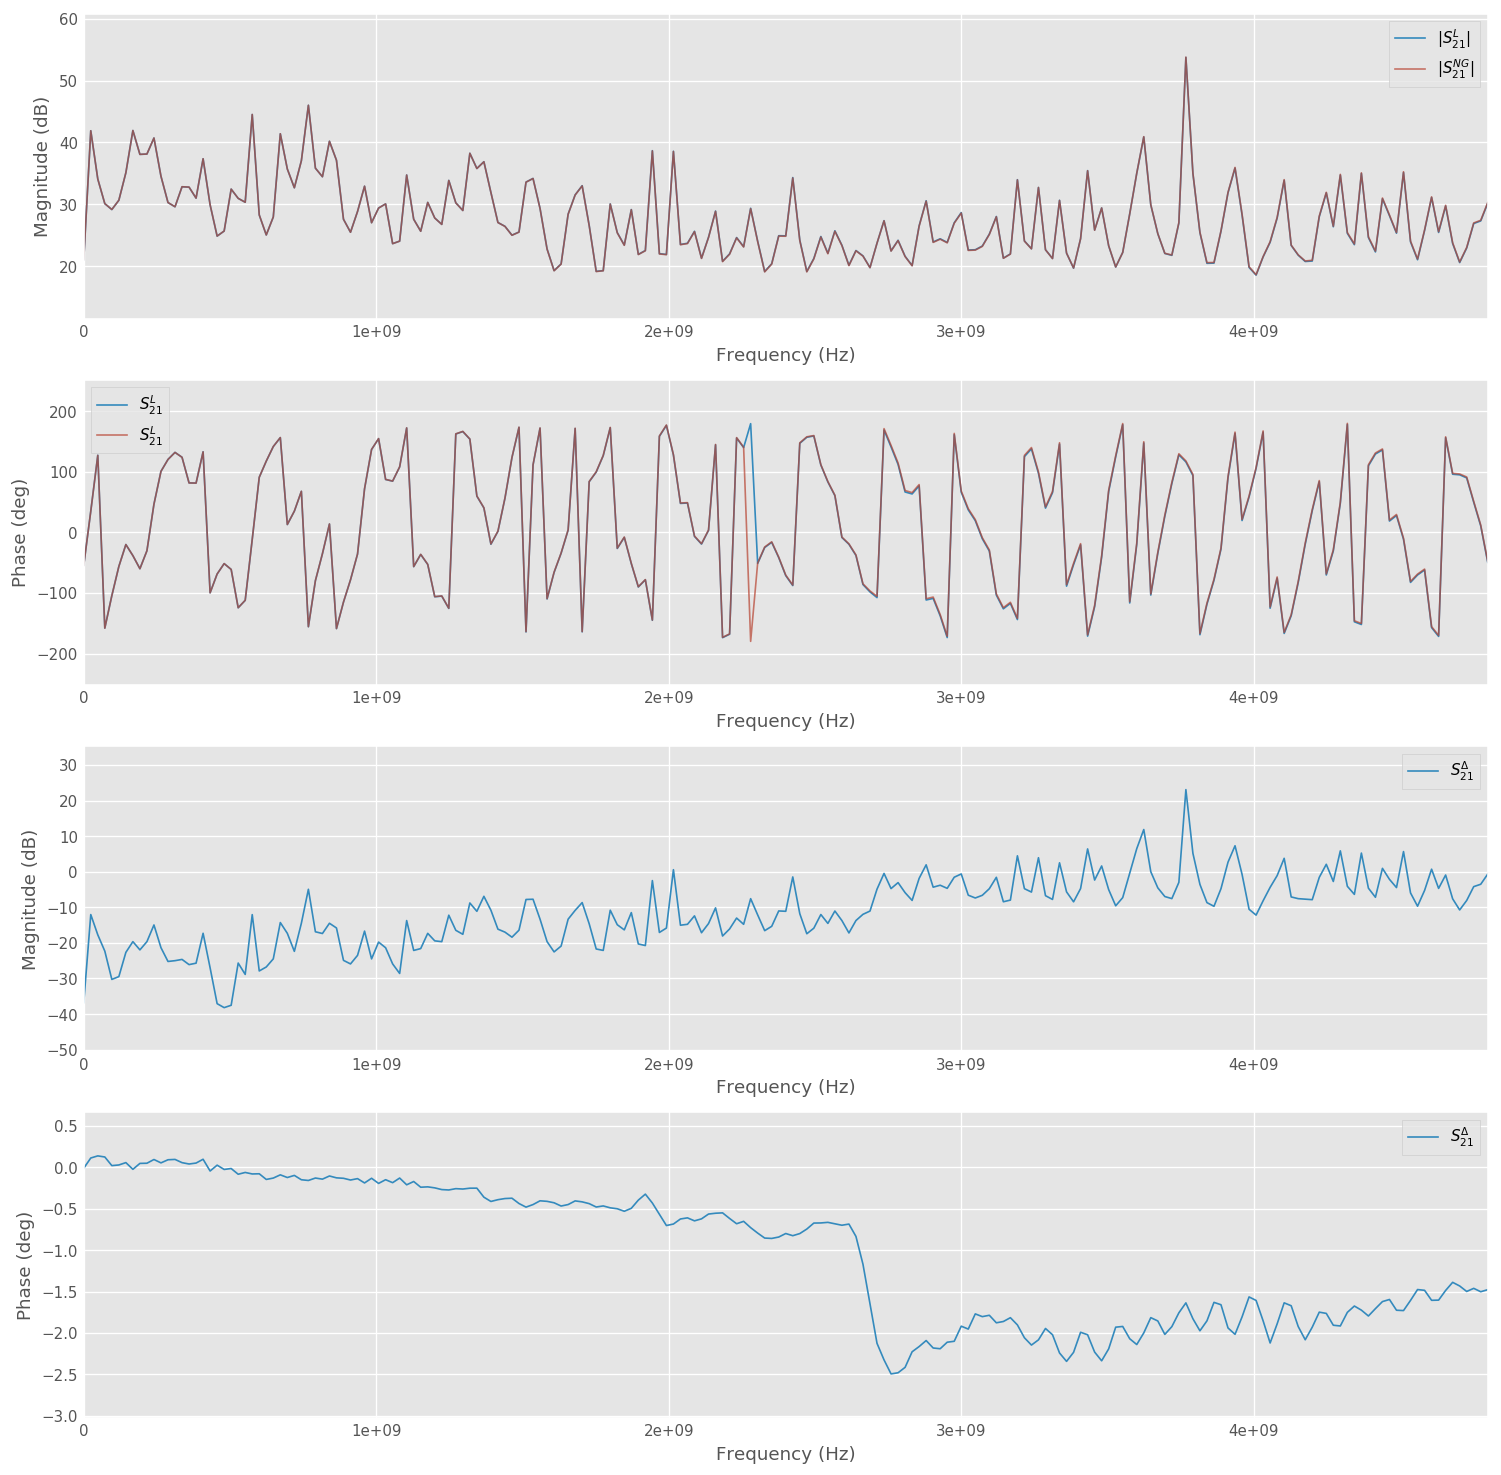

In [237]:
fig,axs = plt.subplots(4,1, figsize=(15,15))

#title('Caompare')
s21_1.s11.plot_s_db(label='$|S_{21}^{L}|$', ax=axs[0])
s21_2.s11.plot_s_db(label='$|S_{21}^{NG}|$', alpha=0.7, ax=axs[0])

s21_1.s11.plot_s_deg(label='$S_{21}^{L}$', ax=axs[1])
s21_2.s11.plot_s_deg(label='$S_{21}^{L}$', alpha=0.7, ax=axs[1])

(s21_1-s21_2).s11.plot_s_db(label='$S_{21}^{\Delta}$', ax=axs[2])
(s21_1/s21_2).s11.plot_s_deg(label='$S_{21}^{\Delta}$', ax=axs[3])

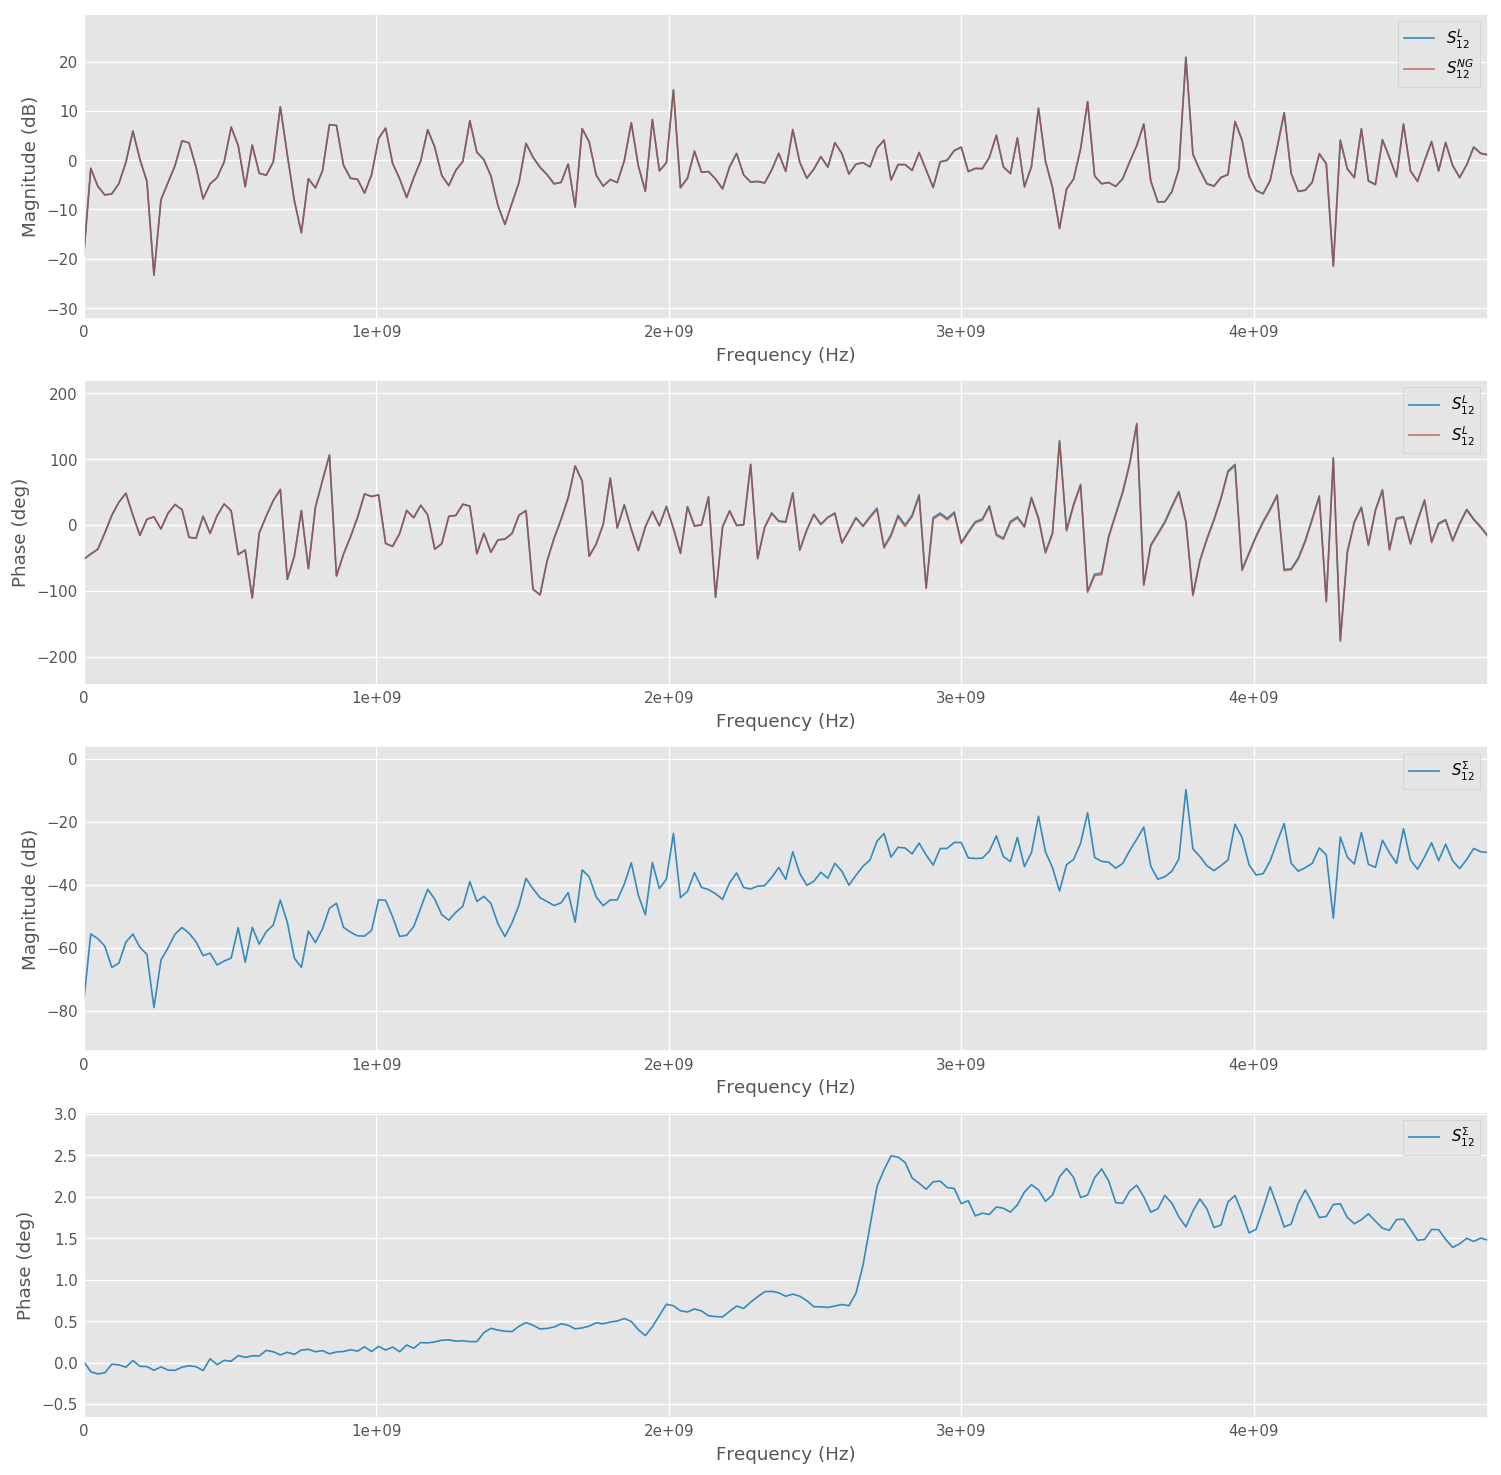

In [233]:
fig,axs = plt.subplots(4,1, figsize=(15,15))

#title('Caompare')
s12_1.s11.plot_s_db(label='$S_{12}^{L}$', ax=axs[0])
s12_2.s11.plot_s_db(label='$S_{12}^{NG}$', alpha=0.7, ax=axs[0])

s12_1.s11.plot_s_deg(label='$S_{12}^{L}$', ax=axs[1])
s12_2.s11.plot_s_deg(label='$S_{12}^{L}$', alpha=0.7, ax=axs[1])

(s12_1-s12_2).s11.plot_s_db(label='$S_{12}^{\Sigma}$', ax=axs[2])
(s12_1/s12_2).s11.plot_s_deg(label='$S_{12}^{\Sigma}$', ax=axs[3])

In [240]:
def save_to_pdf(b):
    %sx jupyter nbconvert F2CalibrationVerifyTermsWithoutCollect.ipynb --to pdf
    
buttonS = widgets.Button(
    description='Save to pdf',
    disabled=False,
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='pdf'
)
buttonS.on_click(save_to_pdf)
buttonS

Button(button_style='info', description='Save to pdf', icon='pdf', style=ButtonStyle(), tooltip='Click me')